# Sales Analysis

#### Import Necessary Libraries

In [1]:
import pandas as pd
import os

#### Task 1 : Merge 12 months of sales data into a single CSV file

In [28]:
apr = r"C:\Users\ZION\Downloads\SalesAnalysis\Sales_Data\Sales_April_2019.csv"
os.path.exists(apr)         # checking if file exists

df = pd.read_csv(apr)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [22]:
files = [file for file in os.listdir(r"C:\Users\ZION\Downloads\SalesAnalysis\Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(os.path.join(r"C:\Users\ZION\Downloads\SalesAnalysis\Sales_Data", file))
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)

#### Read in updated DataFrame

In [26]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


 #### Clean up the data! 

##### Drop Rows of NaN, Repalce with 0

In [176]:
ad = all_data
ad.fillna(value="0", inplace=True)

In [67]:
nan_df = ad[all_data.isna().any(axis=1)]

C:\Users\ZION\AppData\Local\Temp\ipykernel_17512\305806937.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nan_df = ad[all_data.isna().any(axis=1)]


_Find "Or" and delete_

In [65]:
ad = ad[ad['Order Date'].str[:2] != '0']
ad = ad[ad['Order Date'].str[:2] != 'Or']

_Convert columns to correct type_

In [68]:
ad['Quantity Ordered'] = pd.to_numeric(ad['Quantity Ordered'])
ad['Price Each'] = pd.to_numeric(ad['Price Each'])

#### Augment data with additional columns

#### Task 2: Add new 'Month' column

In [63]:
ad["Month"] = ad["Order Date"].str[:2]
ad["Month"] = ad["Month"].astype('int32')   # convert to integer datatype
ad.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 3: Add new 'Sales' column

In [69]:
ad["Sales"] = ad["Quantity Ordered"] * ad["Price Each"]
ad.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 4: Add "City" column

In [96]:

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

ad["City"] = ad["Purchase Address"].apply(lambda x: get_city(x) + ' ' + get_state(x)) 
ad.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


##### Question 1: What was the best month for sales? How much was earned in that month?

In [81]:
results = ad.groupby("Month").sum()[["Sales"]]

In [80]:
import matplotlib.pyplot as plt

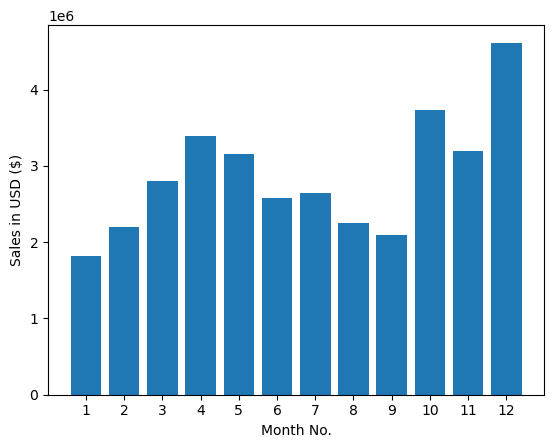

In [84]:
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month No.')
plt.show()

__December seems to be the best month for sales while January seems to be lowest. This can most likely be due to Christmas time and gift-buying, and when January comes around, it slows down abruptly.__

#### Question 2: What city had the highest number of sales?

In [100]:
results = ad.groupby("City").sum()[["Sales"]]
results

,Sales
City,
Atlanta GA,2795498.58
Austin TX,1819581.75
Boston MA,3661642.01
Dallas TX,2767975.40
Los Angeles CA,5452570.80
New York City NY,4664317.43
Portland ME,449758.27
Portland OR,1870732.34
San Francisco CA,8262203.91


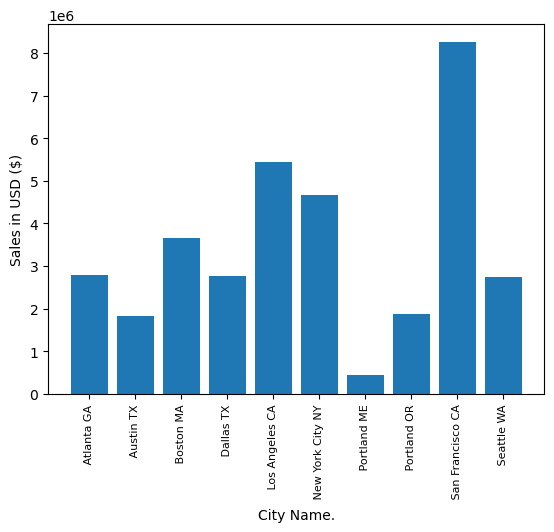

In [103]:
cities = [city for city, df in ad.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation="vertical", size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name.')
plt.show()

__San Francisco, CA__

##### Question 3: What time should we display advertisements to maximize likelihood of customer's buying products?

In [109]:
ad['Order Date'] = pd.to_datetime(ad['Order Date'])
ad["Hour"] = ad["Order Date"].dt.hour
ad["Minute"] = ad["Order Date"].dt.minute
ad.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


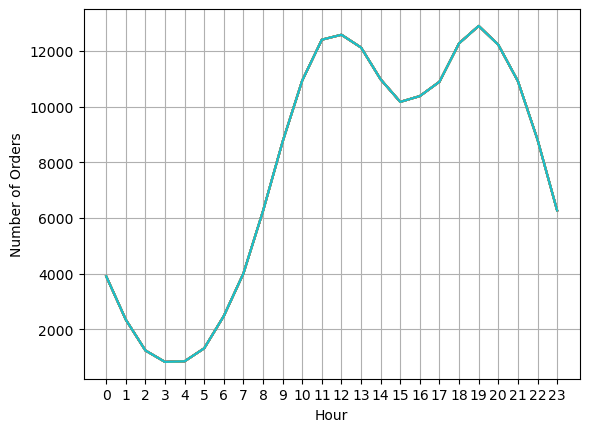

In [115]:
hours = [hour for hour, df in ad.groupby('Hour')]

plt.plot(hours, ad.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()

__My recommendation is around 11am (11) or 7pm (19)__

##### Question 4: What products are most often sold together?

In [130]:
df = ad[ad['Order ID'].duplicated(keep=False)]    # creating dataframe to view products ordered together based on duplicated order id

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates().reset_index(drop=True)
df

C:\Users\ZION\AppData\Local\Temp\ipykernel_17512\2994820373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
0,176560,"Google Phone,Wired Headphones"
1,176574,"Google Phone,USB-C Charging Cable"
2,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176586,"AAA Batteries (4-pack),Google Phone"
4,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
7131,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
7132,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
7133,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
7134,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [132]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

In [143]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


**iPhone and Lightning Charging Cable**

These insights can be used to drive promotional deals with these products. 

##### Question 5: What product sold the most? Why do you think it sold the most?

([<matplotlib.axis.XTick at 0x1f90a6d6320>,
 [Text(0.0, 0, '20in Monitor'),
  Text(1.0, 0, '27in 4K Gaming Monitor'),
  Text(2.0, 0, '27in FHD Monitor'),
  Text(3.0, 0, '34in Ultrawide Monitor'),
  Text(4.0, 0, 'AA Batteries (4-pack)'),
  Text(5.0, 0, 'AAA Batteries (4-pack)'),
  Text(6.0, 0, 'Apple Airpods Headphones'),
  Text(7.0, 0, 'Bose SoundSport Headphones'),
  Text(8.0, 0, 'Flatscreen TV'),
  Text(9.0, 0, 'Google Phone'),
  Text(10.0, 0, 'LG Dryer'),
  Text(11.0, 0, 'LG Washing Machine'),
  Text(12.0, 0, 'Lightning Charging Cable'),
  Text(13.0, 0, 'Macbook Pro Laptop'),
  Text(14.0, 0, 'ThinkPad Laptop'),
  Text(15.0, 0, 'USB-C Charging Cable'),
  Text(16.0, 0, 'Vareebadd Phone'),
  Text(17.0, 0, 'Wired Headphones'),
  Text(18.0, 0, 'iPhone')])

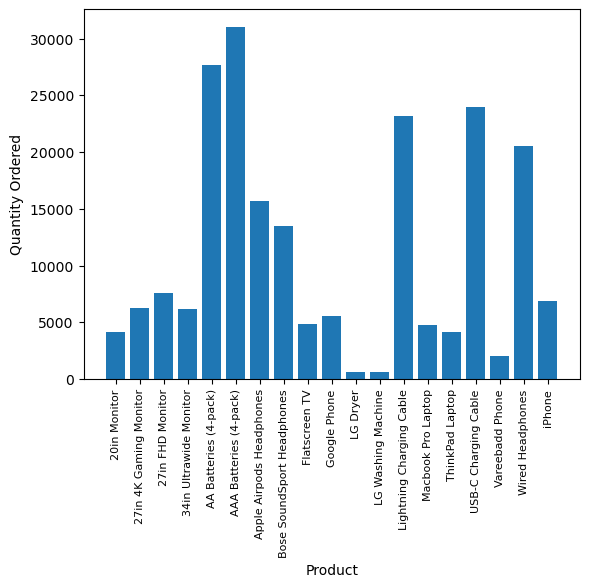

In [161]:
products = [product for product, df in product_group]

ad['Quantity Ordered'] = ad['Quantity Ordered'].astype(int)
product_group = ad.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()

plt.bar(products, quantity_ordered)
plt.ylabel("Quantity Ordered")
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)



C:\Users\ZION\AppData\Local\Temp\ipykernel_17512\4169516015.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


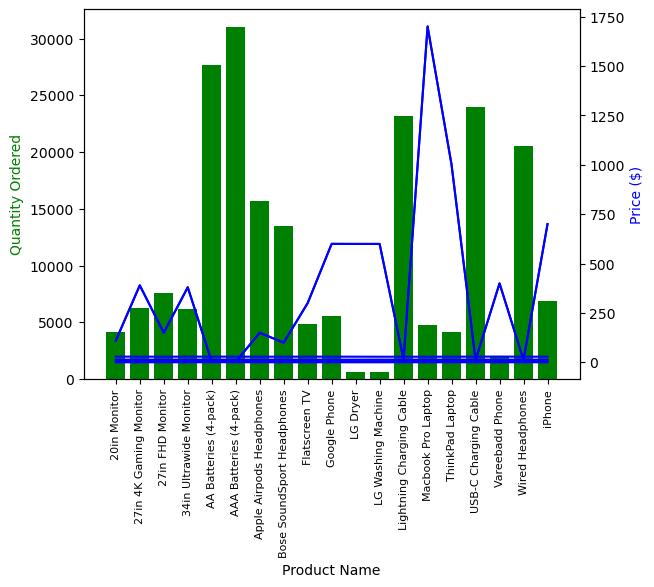

In [171]:
prices = ad.groupby('Product').mean(['Price Each'])

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()

__From the above visuals, we can infer that AAA batteries sold the most, soley because of their low price, as ther seems to be a possible correlation between price and quantity ordered, the lower the price, the more ordered.__

In [175]:
prices.corr()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Quantity Ordered,1.000000,-0.403323,0.256646,-0.402915,0.036653,0.177253
Price Each,-0.403323,1.000000,-0.225129,1.000000,0.253430,-0.363714
Month,0.256646,-0.225129,1.000000,-0.224400,-0.267900,0.198784
Sales,-0.402915,1.000000,-0.224400,1.000000,0.253179,-0.363740
Hour,0.036653,0.253430,-0.267900,0.253179,1.000000,-0.420225
Minute,0.177253,-0.363714,0.198784,-0.363740,-0.420225,1.000000
